In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from experiment_mnist import *
from tfshow import *

Using TensorFlow backend.


In [2]:
methods = ['l1', 'l2', 'delta', 'dropout', 'none']
activations = ['sigmoid', 'relu']
layers = [1,2,3,4,5,6]
reg_coeff = np.logspace(-3,3,10)

### Sigmoid, 1 layer, 50 neurons, 0.2 dropout, K = 0.1

In [3]:
N = [50]
P = 0.2
K = 0.1
epochs = 200
activation = 'sigmoid'

  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.39it/s]


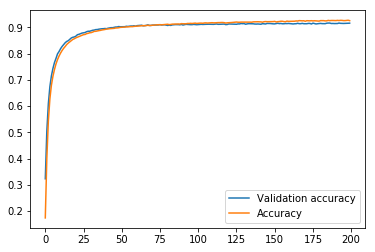

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


In [4]:
model_no_reg = MNISTExperiment(N, P, K, epochs = epochs, activation = activation, reg_type = 0,
                             reg_coeff = 0, do_print = True)

100%|██████████| 20/20 [00:01<00:00, 11.60it/s]


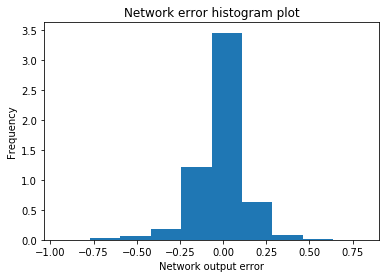

Error; maximal over inputs, average over dropout:
True values array mean: 0.098686 variance 0.271846
Experiment 0.210290 Std 0.253088
Equation   0.682450 Std 0.740402
Tightness  30.8% Std 34.2%


(0.21028997, 0.25308815, 0.6824496269226075, 0.7404023056984628, 0.2718461)

In [5]:
model_no_reg.run(inputs = 20, repetitions = 10000)

In [6]:
acc_no_reg = model_no_reg.get_accuracy(1000, 1000, tqdm_ = tqdm)
print(acc_no_reg)

100%|██████████| 1000/1000 [00:08<00:00, 118.64it/s]

0.857627


In [7]:
acc_no_reg_orig = model_no_reg.get_accuracy(1000, 1000, tqdm_ = tqdm, no_dropout = True)
print(acc_no_reg_orig)

100%|██████████| 1000/1000 [00:00<00:00, 4134.09it/s]

0.919


In [8]:
def plot_error(method = 'l1', coeffs = np.logspace(-10, 1, 30)):
    models = {coeff: MNISTExperiment(N, P, K, epochs = epochs, activation = activation, reg_type = method,
                                 reg_coeff = coeff, do_print = True) for coeff in coeffs}
    fail_accs = [models[coeff].get_accuracy(500, 500) for coeff in tqdm(coeffs)]
    orig_accs = [models[coeff].get_accuracy(500, no_dropout = True) for coeff in tqdm(coeffs)]
    plt.figure()
    plt.title(method + ' and resilience')
    plt.xlabel('Regularization coefficient')
    plt.ylabel('Accuracy')
    plt.plot(coeffs, fail_accs, label = 'Dropout')
    plt.plot(coeffs, orig_accs, label = 'No dropout')
    plt.plot(coeffs, [acc_no_reg] * len(coeffs), label = 'No reg, dropout')
    plt.plot(coeffs, [acc_no_reg_orig] * len(coeffs), label = 'No reg, no dropout')
    plt.xscale('log')
    plt.legend()
    plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.62it/s]


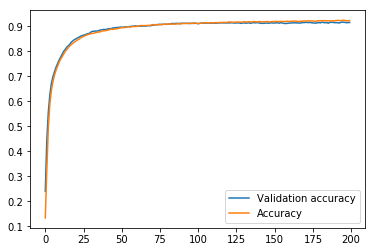

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:17<00:00, 10.75it/s]


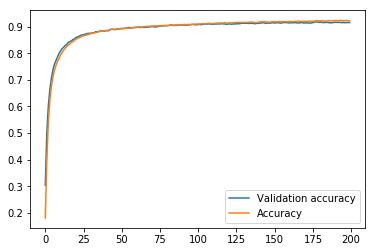

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 11.08it/s]


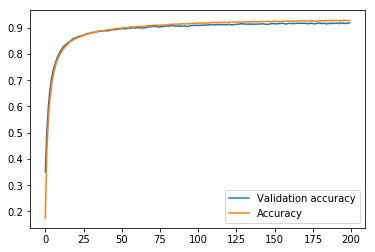

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 11.03it/s]


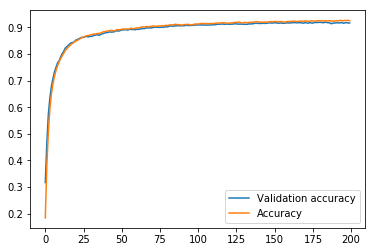

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 11.02it/s]


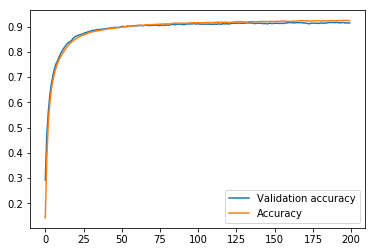

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 11.06it/s]


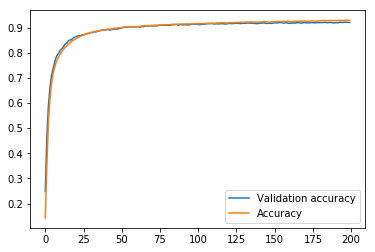

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 11.19it/s]


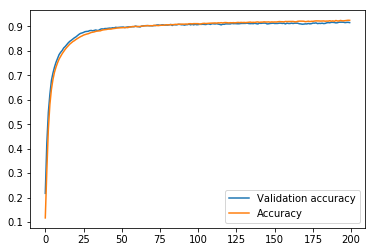

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.97it/s]


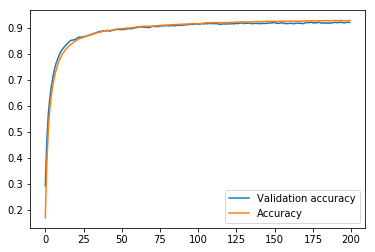

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.93it/s]


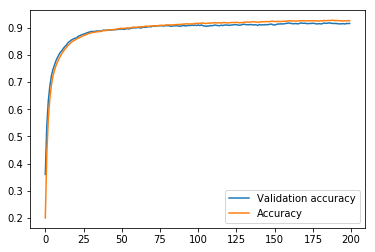

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 11.39it/s]


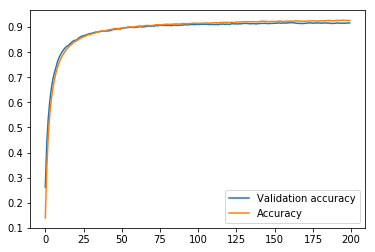

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_68 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.91it/s]


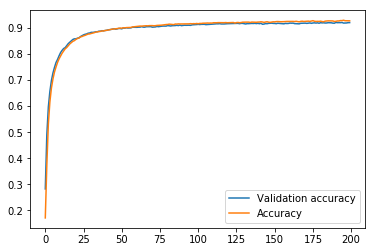

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_74 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.87it/s]


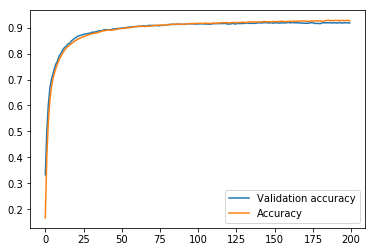

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_80 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.85it/s]


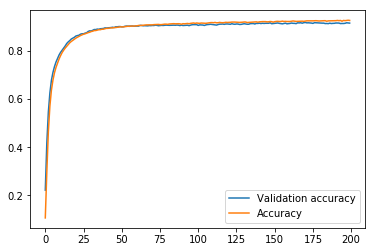

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_86 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.82it/s]


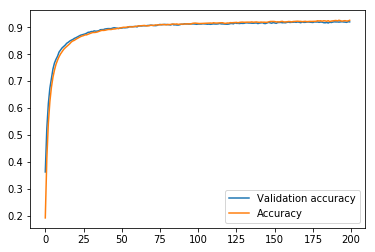

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_92 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.81it/s]


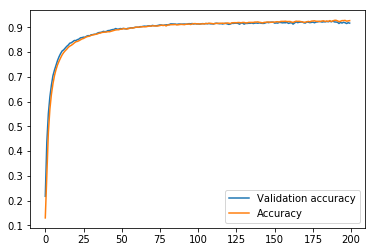

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_98 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.60it/s]


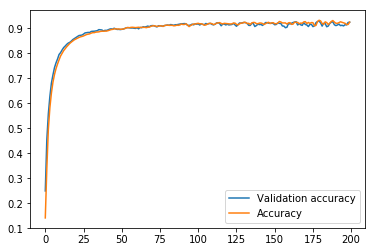

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_104 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.75it/s]


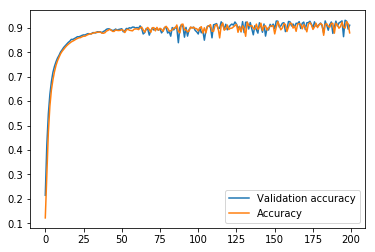

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_110 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.64it/s]


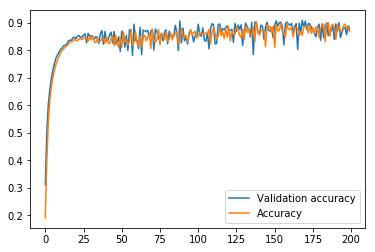

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_116 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.74it/s]


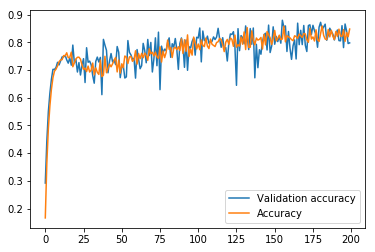

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_122 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 11.52it/s]


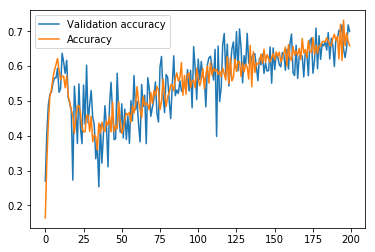

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_128 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.19it/s]


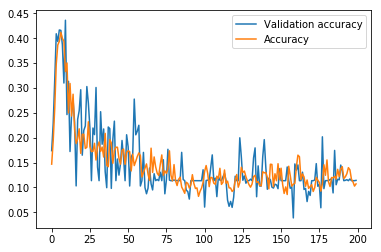

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_134 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.55it/s]


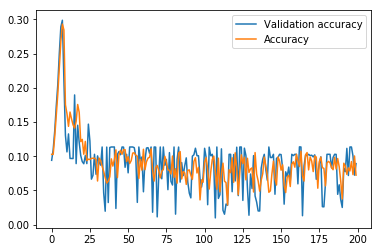

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_140 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.78it/s]


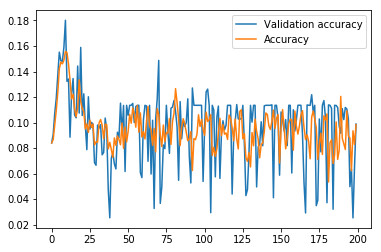

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_146 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.73it/s]


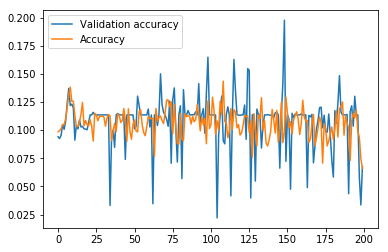

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_152 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.69it/s]


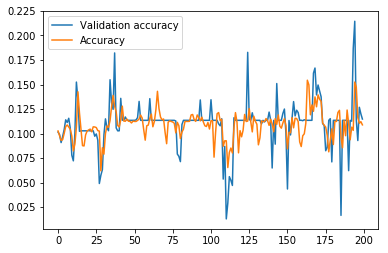

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_158 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.57it/s]


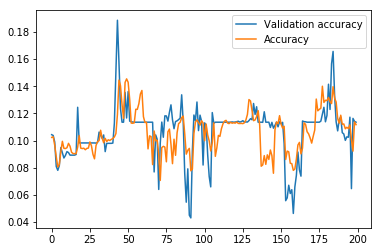

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_164 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 11.10it/s]


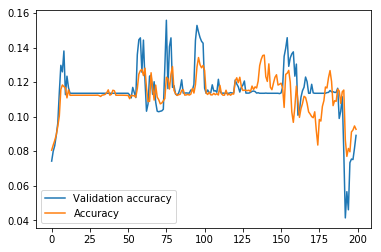

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_170 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.76it/s]


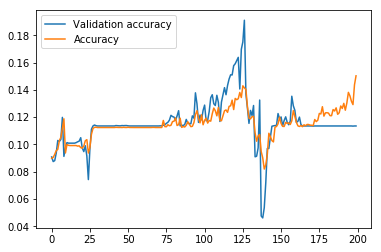

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_176 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 11.08it/s]


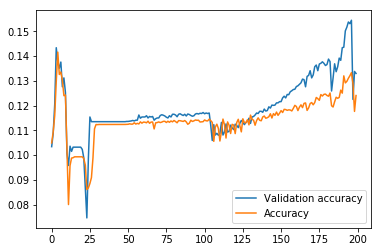

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_182 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.58it/s]


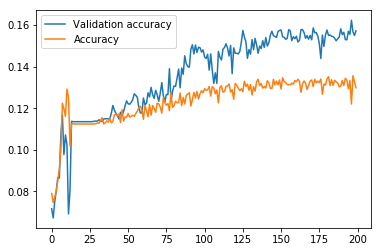

  0%|          | 0/30 [00:00<?, ?it/s]

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


100%|██████████| 30/30 [00:16<00:00,  1.91it/s]


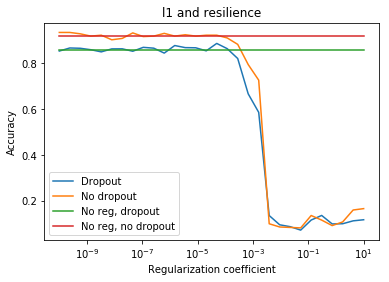

In [9]:
plot_error('l1')

  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_188 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.49it/s]


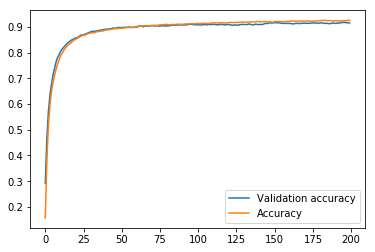

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_194 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:18<00:00, 10.59it/s]


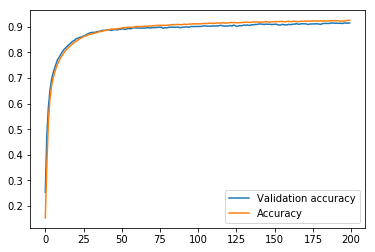

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_200 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 11.09it/s]


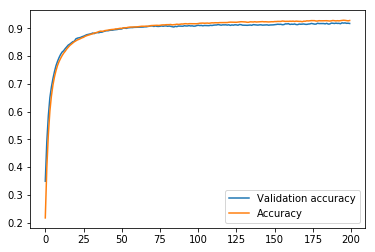

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_206 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 11.14it/s]


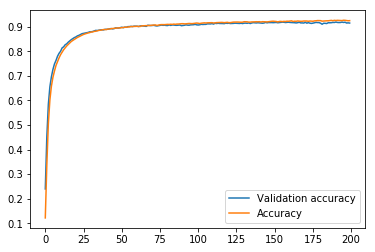

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_212 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.46it/s]


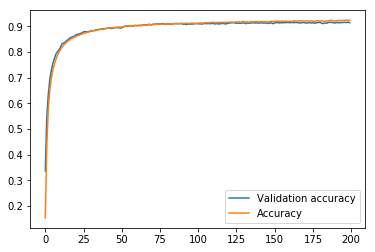

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_217 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_218 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.33it/s]


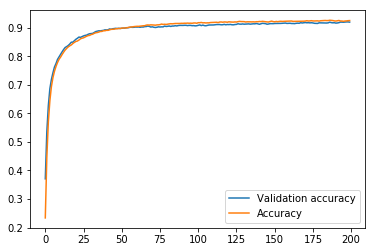

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_223 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_224 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.22it/s]


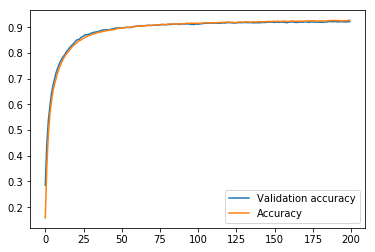

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_230 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 11.31it/s]


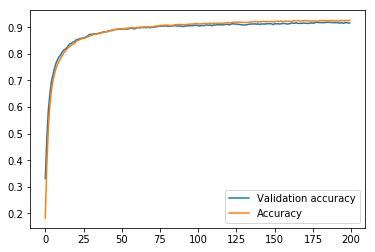

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_236 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.45it/s]


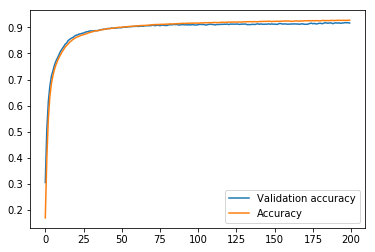

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_241 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_242 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.32it/s]


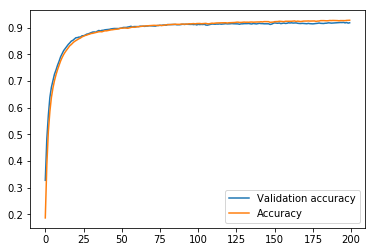

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_247 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_248 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 11.07it/s]


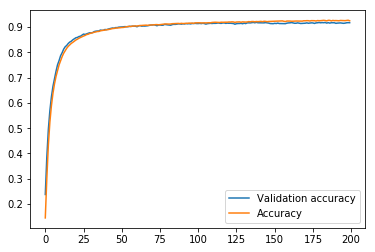

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_254 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.35it/s]


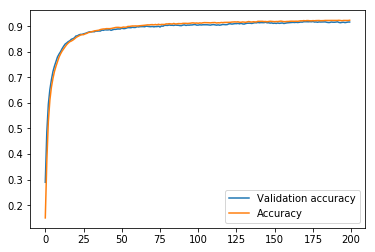

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_259 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_260 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.22it/s]


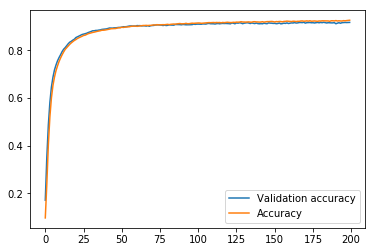

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_265 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_266 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.24it/s]


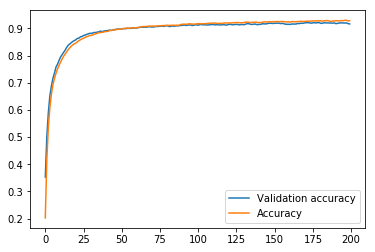

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_271 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_272 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.31it/s]


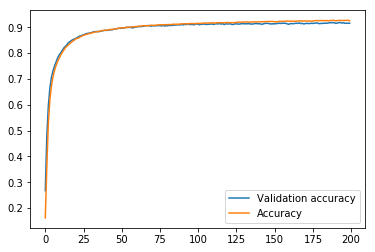

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_277 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_278 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.26it/s]


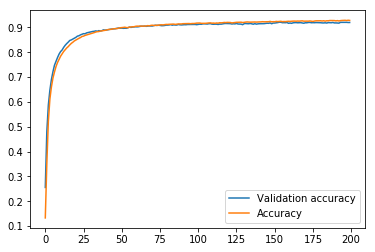

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_283 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_284 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.87it/s]


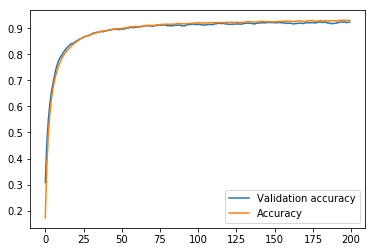

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_289 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_290 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.18it/s]


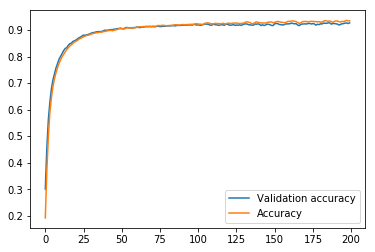

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_295 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_296 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.17it/s]


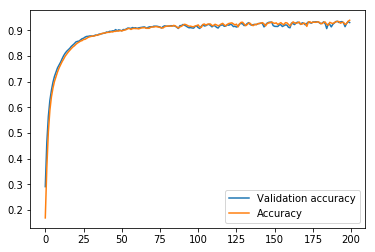

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_301 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_302 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.11it/s]


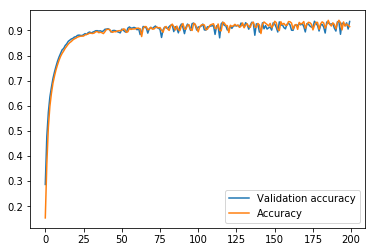

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_307 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_308 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.17it/s]


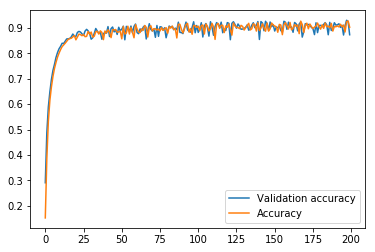

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_313 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_314 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.03it/s]


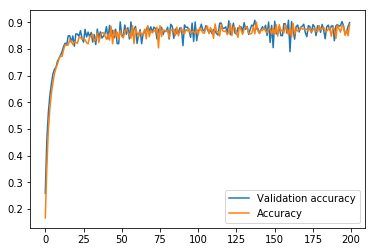

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_319 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_320 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.08it/s]


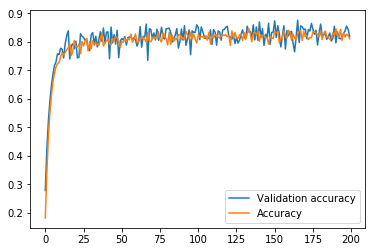

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_325 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_326 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.93it/s]


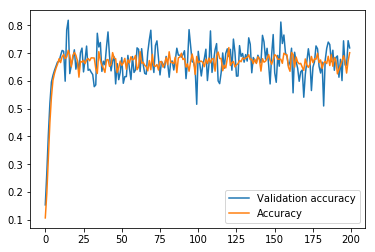

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_331 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_332 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.08it/s]


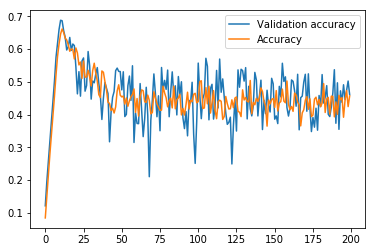

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_337 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_338 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.98it/s]


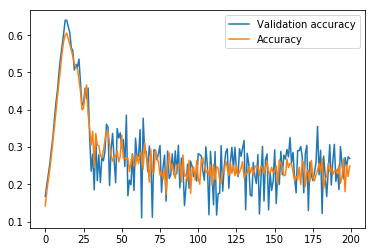

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_343 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_344 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.07it/s]


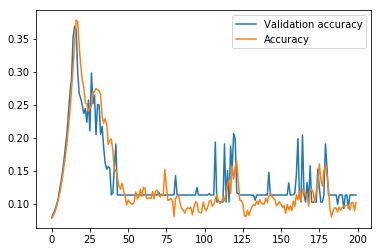

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_349 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_350 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.89it/s]


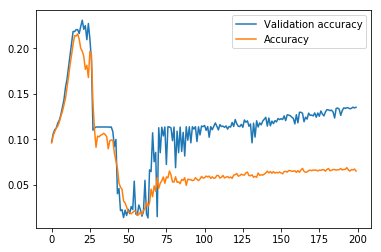

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_355 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_356 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:19<00:00, 10.92it/s]


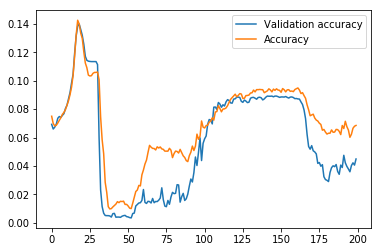

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_361 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_362 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.97it/s]


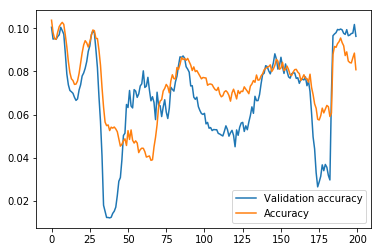

  0%|          | 0/30 [00:00<?, ?it/s]

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


100%|██████████| 30/30 [00:28<00:00,  1.08it/s]


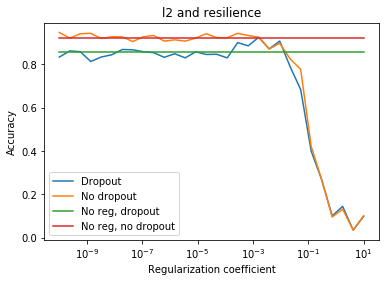

In [10]:
plot_error('l2')

  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_367 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_368 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00, 11.02it/s]


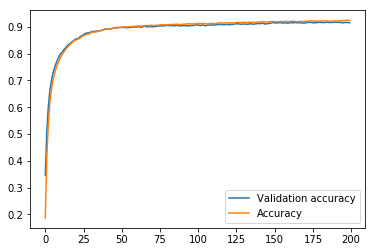

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_373 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_374 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.96it/s]


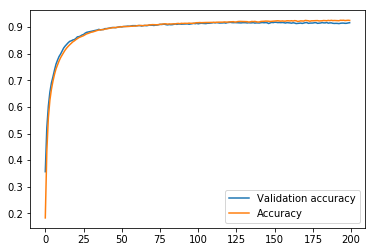

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_379 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_380 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00, 10.71it/s]


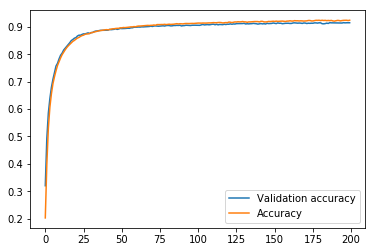

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_385 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_386 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.93it/s]


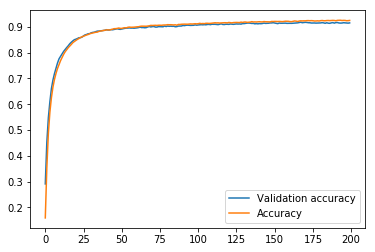

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_391 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_392 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.82it/s]


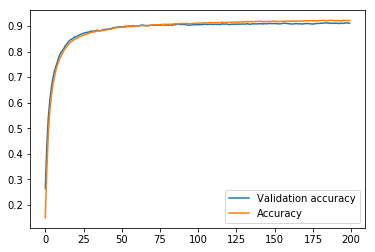

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_397 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_398 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00, 10.84it/s]


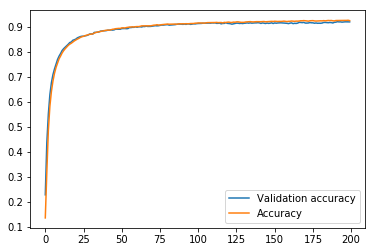

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_403 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_404 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00, 10.92it/s]


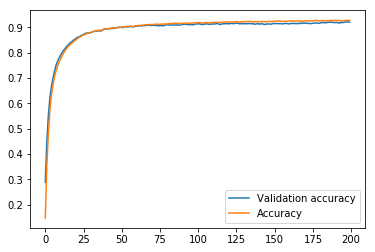

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_409 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_410 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00, 10.02it/s]


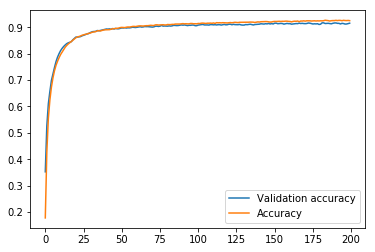

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_415 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_416 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.71it/s]


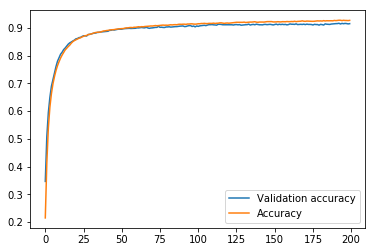

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_421 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_422 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.77it/s]


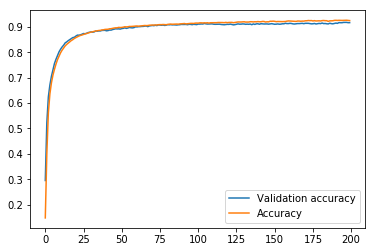

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_427 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_428 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.72it/s]


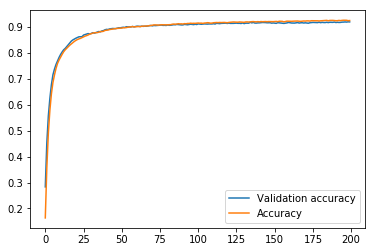

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_433 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_434 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00, 10.76it/s]


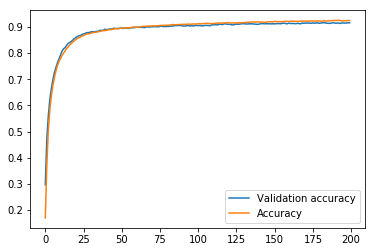

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_439 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_440 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.68it/s]


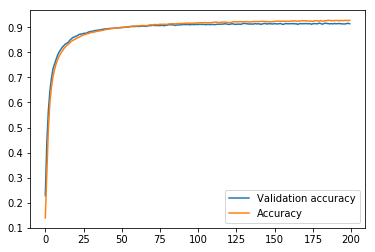

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_445 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_446 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00, 10.39it/s]


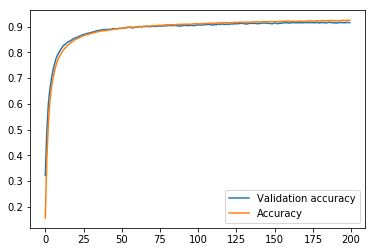

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_451 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_452 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.53it/s]


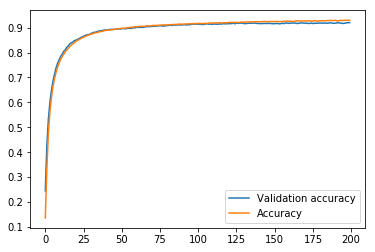

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_457 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_458 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.58it/s]


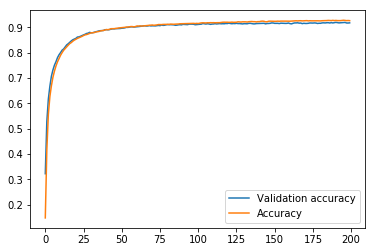

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_463 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_464 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00, 10.67it/s]


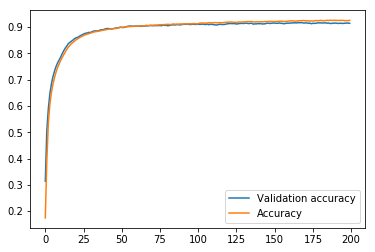

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_469 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_470 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00, 10.57it/s]


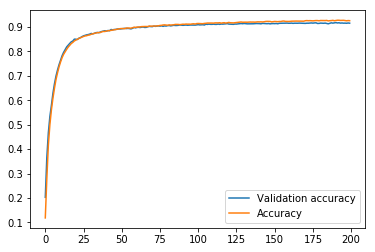

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_475 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_476 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.58it/s]


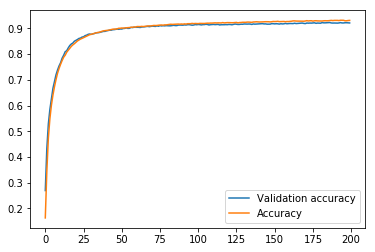

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_481 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_482 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00, 10.38it/s]


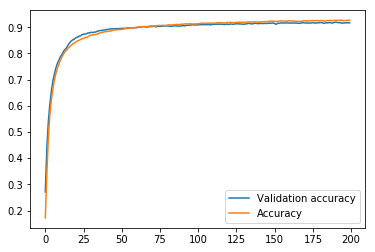

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_487 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_488 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.54it/s]


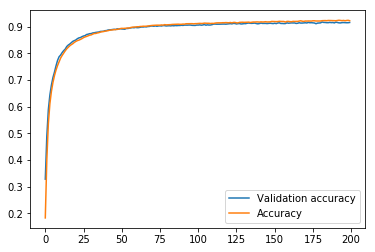

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_493 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_494 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:20<00:00,  9.57it/s]


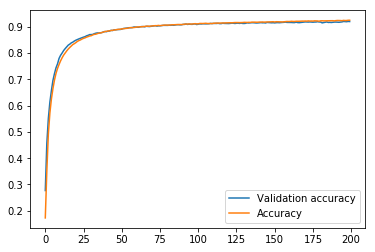

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_499 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_500 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00, 10.10it/s]


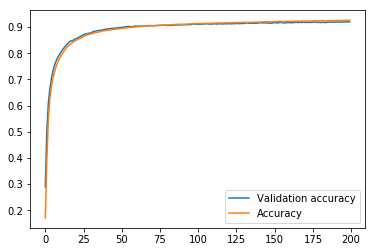

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_505 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_506 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00,  9.47it/s]


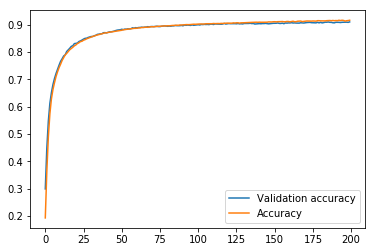

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_511 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_512 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00, 10.50it/s]


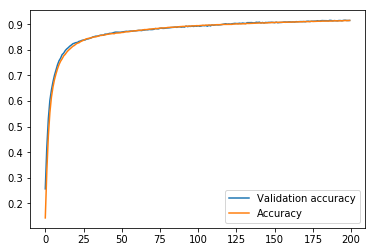

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_517 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_518 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00, 10.48it/s]


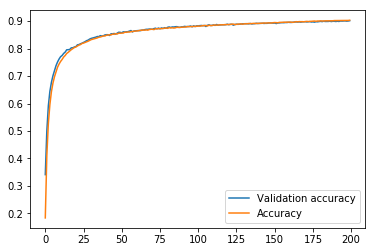

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_523 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_524 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00, 10.35it/s]


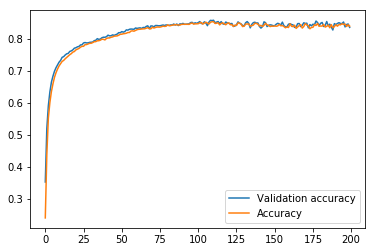

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_529 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_530 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00,  9.41it/s]


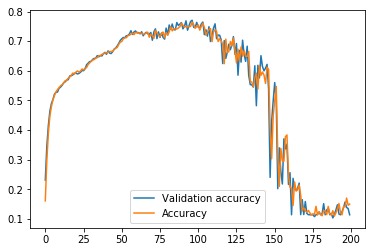

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_535 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_536 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00, 10.65it/s]


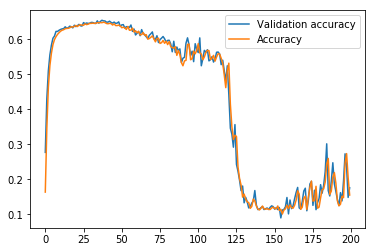

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


  0%|          | 0/200 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_541 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_542 (Dense)            (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:21<00:00, 10.58it/s]


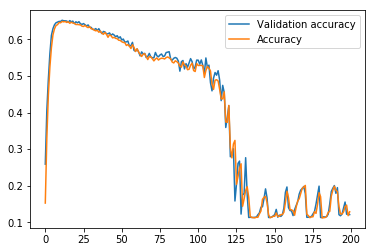

  0%|          | 0/30 [00:00<?, ?it/s]

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


100%|██████████| 30/30 [00:40<00:00,  1.35s/it]


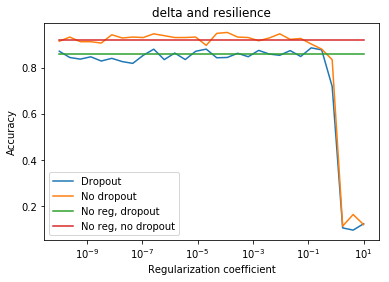

In [11]:
plot_error('delta')